<a href="https://colab.research.google.com/github/lalit-kumr/ai_ml_notebooks/blob/main/cifar_10_image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt


In [8]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0


In [9]:
# class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
#                'dog', 'frog', 'horse', 'ship', 'truck']

# plt.figure(figsize=(10,10))
# for i in range(25):
#     plt.subplot(5,5,i+1)
#     plt.xticks([])
#     plt.yticks([])
#     plt.grid(False)
#     plt.imshow(train_images[i])
#     # The CIFAR labels happen to be arrays, 
#     # which is why you need the extra index
#     plt.xlabel(class_names[train_labels[i][0]])
# plt.show()


In [10]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
Total params: 56,320
Trainable params: 56,320
Non-trai

In [11]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [12]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))


Epoch 1/10
1563/1563 [==============================] - 13s 8ms/step - loss: 1.5144 - accuracy: 0.4474 - val_loss: 1.2742 - val_accuracy: 0.5368
Epoch 2/10
1563/1563 [==============================] - 12s 8ms/step - loss: 1.1681 - accuracy: 0.5879 - val_loss: 1.1779 - val_accuracy: 0.5794
Epoch 3/10
1563/1563 [==============================] - 12s 8ms/step - loss: 1.0123 - accuracy: 0.6463 - val_loss: 1.0501 - val_accuracy: 0.6389
Epoch 4/10
1563/1563 [==============================] - 12s 8ms/step - loss: 0.9136 - accuracy: 0.6796 - val_loss: 0.9612 - val_accuracy: 0.6682
Epoch 5/10
1563/1563 [==============================] - 12s 8ms/step - loss: 0.8429 - accuracy: 0.7036 - val_loss: 0.9474 - val_accuracy: 0.6749
Epoch 6/10
1563/1563 [==============================] - 12s 8ms/step - loss: 0.7825 - accuracy: 0.7285 - val_loss: 0.8921 - val_accuracy: 0.6919
Epoch 7/10
1563/1563 [==============================] - 12s 8ms/step - loss: 0.7331 - accuracy: 0.7432 - val_loss: 0.8528 - val_ac

313/313 - 1s - loss: 0.8639 - accuracy: 0.7072 - 1s/epoch - 3ms/step


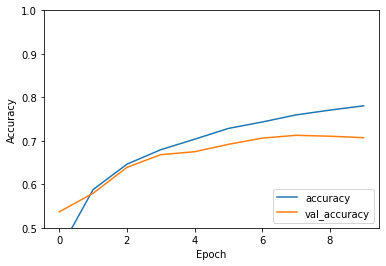

In [13]:
#model evaluation
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
